In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
train_df=pd.read_csv('./toxic_train.csv')
test_df=pd.read_csv('./test.csv/toxic_test.csv')

In [3]:
train_df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
143814,031273b15d0e9b4e,Loumurru \n\nI wanted to let you know about th...,0,0,0,0,0,0
102201,22eb9a32be3c9140,""" May 2005 (UTC)\n\nDear Flamekeeper,\nI did n...",0,0,0,0,0,0
118183,776e4e6f88697377,"""\n\nHello. To Jeffro77 above... The origina...",0,0,0,0,0,0
152208,89859e5e41e7dda6,"""\n\n 2013 Constitution \n\nThe last sentence ...",0,0,0,0,0,0
57853,9adfe586ce1baa6a,How come your name used to be Peter? Are you a...,1,0,0,0,0,0


In [4]:
cols_target=['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [5]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
unlabelled_in_all=train_df[(train_df['toxic']!=1)&(train_df['severe_toxic']!=1)&(train_df['obscene']!=1)&
                          (train_df['threat']!=1)&(train_df['insult']!=1)&(train_df['identity_hate']!=1)]
print('Percentage of unlabelled comments is ',len(unlabelled_in_all)/len(train_df)*100)

Percentage of unlabelled comments is  89.83211235124176


In [7]:
no_comment=train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [8]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [9]:
no_comment=test_df[test_df['comment_text'].isnull()]
no_comment

,id,comment_text


In [10]:
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 153164
Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [11]:
train_df['char_length']=train_df['comment_text'].apply(lambda x: len(str(x)))

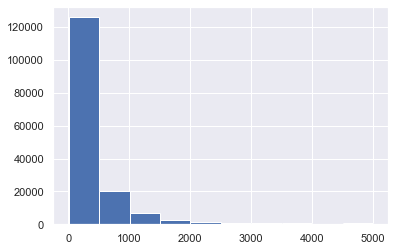

In [12]:
sns.set()
train_df['char_length'].hist()
plt.show()

In [13]:
data=train_df[cols_target]

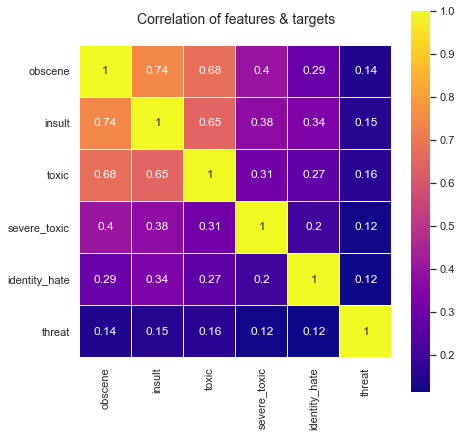

In [15]:
colormap=plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [16]:
test_df['char_length']=test_df['comment_text'].apply(lambda x: len(str(x)))

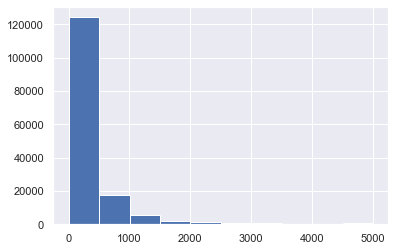

In [17]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()

In [18]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r"what's", "what is ", text)
    text=re.sub(r"\'s", " ",text)
    text=re.sub(r"\'ve"," have ", text)
    text=re.sub(r"can't","cannot ", text)
    text=re.sub(r"n't"," not ", text)
    text=re.sub(r"i'm", "i am ", text)
    text=re.sub(r"\'re", " are ", text)
    text=re.sub(r"\'d"," would ", text)
    text=re.sub(r"\'ll", " will ",text)
    text=re.sub(r"\'scuse"," excuse ",text)
    text=re.sub('\W',' ',text)
    text=re.sub('\s+',' ',text)
    text=text.strip(' ')
    return text

In [19]:
train_df['comment_text']=train_df['comment_text'].map(lambda com : clean_text(com))

In [20]:
test_df['comment_text']=test_df['comment_text'].map(lambda com : clean_text(com))

In [21]:
train_df=train_df.drop('char_length',axis=1)

In [22]:
X=train_df.comment_text
test_X=test_df.comment_text

In [23]:
print(X.shape, test_X.shape)

(159571,) (153164,)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(max_features=5000, stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [27]:
X_dtm=vect.fit_transform(X)
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178715 stored elements in Compressed Sparse Row format>

In [28]:
test_X_dtm=vect.transform(test_X)
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2618947 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression(C=12.0)

submission_binary=pd.read_csv('../sample_submission.csv/toxic_sample_submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y=train_df[label]
    logreg.fit(X_dtm,y)
    y_pred_X=logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    
    test_y_prob=logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label]=test_y_prob

... Processing obscene


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9832363023356374
... Processing insult


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9755469352200588
... Processing toxic


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9639408163137412
... Processing severe_toxic


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9921100951927355
... Processing identity_hate


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9939713356436947
... Processing threat
Training accuracy is 0.9981199591404453


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999959,0.460049,0.999967,0.050480,0.971455,0.436740
1,0000247867823ef7,0.002420,0.000433,0.000402,0.000325,0.003244,0.000409
2,00013b17ad220c46,0.011289,0.000115,0.003129,0.000035,0.007158,0.001216
3,00017563c3f7919a,0.001385,0.002118,0.000949,0.000117,0.000884,0.000034
4,00017695ad8997eb,0.019292,0.000793,0.001201,0.000600,0.003163,0.000568


In [31]:
submission_binary.to_csv('submission_binary.csv',index=False)

In [32]:
submission_chains=pd.read_csv('../sample_submission.csv/toxic_sample_submission.csv')

def add_feature(X,feature_to_add):
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T],'csr')

In [33]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y=train_df[label]
    logreg.fit(X_dtm,y)
    y_pred_X=logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    test_y=logreg.predict(test_X_dtm)
    test_y_prob=logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label]=test_y_prob
    X_dtm = add_feature(X_dtm,y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    test_X_dtm=add_feature(test_X_dtm,test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

... Processing obscene


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9832363023356374
Shape of X_dtm is now (159571, 5001)
Shape of test_X_dtm is now (153164, 5001)
... Processing insult


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9817510700565892
Shape of X_dtm is now (159571, 5002)
Shape of test_X_dtm is now (153164, 5002)
... Processing toxic


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9675818287784121
Shape of X_dtm is now (159571, 5003)
Shape of test_X_dtm is now (153164, 5003)
... Processing severe_toxic


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9929686471852655
Shape of X_dtm is now (159571, 5004)
Shape of test_X_dtm is now (153164, 5004)
... Processing identity_hate


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9955192359513947
Shape of X_dtm is now (159571, 5005)
Shape of test_X_dtm is now (153164, 5005)
... Processing threat


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9985649021438733
Shape of X_dtm is now (159571, 5006)
Shape of test_X_dtm is now (153164, 5006)


In [34]:
submission_chains.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999971,4.156529e-01,0.999967,0.191065,0.901263,0.593794
1,0000247867823ef7,0.002567,4.005855e-10,0.000402,0.000074,0.004005,0.000134
2,00013b17ad220c46,0.008637,1.124535e-10,0.003129,0.000009,0.004938,0.000515
3,00017563c3f7919a,0.001179,4.702385e-09,0.000949,0.000065,0.000601,0.000005
4,00017695ad8997eb,0.020541,6.238681e-10,0.001201,0.000162,0.001761,0.000107


In [35]:
submission_chains.to_csv('submission_chains.csv',index=False)

In [37]:
submission_combined=pd.read_csv('../sample_submission.csv/toxic_sample_submission.csv')

In [38]:
for label in cols_target:
    submission_combined[label]=0.5*(submission_chains[label]+submission_binary[label])

In [39]:
submission_combined.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999965,0.437851,0.999967,0.120772,0.936359,0.515267
1,0000247867823ef7,0.002493,0.000217,0.000402,0.000199,0.003624,0.000271
2,00013b17ad220c46,0.009963,0.000057,0.003129,0.000022,0.006048,0.000865
3,00017563c3f7919a,0.001282,0.001059,0.000949,0.000091,0.000742,0.000019
4,00017695ad8997eb,0.019916,0.000397,0.001201,0.000381,0.002462,0.000337


In [40]:
submission_combined.to_csv('submission_combined.csv',index=False)